In [31]:
nci_pid_tcr_signaling_uuid = "0c2862fa-6196-11e5-8ac5-06603eb7f303"
sonic_hedgehog_uuid = "cfd3528f-a7a4-11eb-9e72-0ac135e8bacf"
nest_uuid = "60112105-f853-11e9-bb65-0ac135e8bacf"
string_hc_uuid = "275bd84e-3d18-11e8-a935-0ac135e8bacf"
SERVER = "https://www.ndexbio.org"
test_network = ndex2.create_nice_cx_from_server(SERVER, uuid=string_hc_uuid)
test_network.print_summary()
#test_networkx = test_network.to_networkx()
#test_pos = make_networkx_pos_from_cx_coordinates(test_network)
#nx.draw(test_networkx, test_pos)
#print(test_network.get_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT))

Name: STRING - Human Protein Links - High Confidence (Score >= 0.7)
Nodes: 17185
Edges: 420534
Node Attributes: 34370
Edge Attributes: 6308010



In [3]:
def igraph_from_nice_cx(nice_cx):
    g = igraph.Graph(len(nice_cx.get_nodes()))
    # network attributes
    for name in nice_cx.get_network_attribute_names():
        value = nice_cx.get_network_attribute(name)["v"]
        #print(value)
        g[name]=value      
    # attribute declarations
    # nodes and attributes and coordinates
    # make a node_id list
    node_id_list = []
    n_id = 0
    for node_id, node in nice_cx.get_nodes():
        g.vs[n_id]["cx_id"] = node_id
        atts = nice_cx.get_node_attributes(node_id)
        for att in atts:
            att_name = att["n"]
            att_value = att["v"]
            g.vs[n_id][att_name] = att_value
        n_id += 1
        
    # edges and attributes
    for edge_id, edge in nice_cx.get_edges():
        cx_source_id = edge["s"]
        cx_target_id = edge["t"]
        g_source = g.vs.find(cx_id=cx_source_id)
        g_target = g.vs.find(cx_id=cx_target_id)
        g.add_edges([(g_source, g_target)])
        e_id = g.get_eid(g_source, g_target)
        g.es[e_id]["cx_id"] = edge_id
        atts = nice_cx.get_edge_attributes(node_id)
        for att in atts:
            att_name = att["n"]
            att_value = att["v"]
            g.es[e_id][att_name] = att_value

    # cartesian coordinates
    g["cartesian_layout"] = nice_cx.get_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT)
    #visual styles
    # bypasses
    # rules
    return g
   

In [32]:
g = igraph_from_nice_cx(test_network)
print(g.es[1])

KeyboardInterrupt: 

In [5]:
def igraph_layout_from_cx_cartesian_layout(g, cx_layout):
    igraph_layout = [(0,0)] * len(cx_layout)
    for node in cx_layout:
        # find the id of the node in g that has the cx_id == the id of the node
        igraph_node_id = g.vs.find(cx_id=node["node"]).index
        igraph_layout[igraph_node_id] = (node["x"],node["y"])
    return igraph.Layout(igraph_layout)

def draw_igraph_with_cx_layout(g, cx_layout):
    l = igraph_layout_from_cx_cartesian_layout(g, cx_layout)
    fig, ax = plt.subplots()
    igraph.plot(g, layout=l, target=ax)

<Layout with 75 vertices and 2 dimensions>


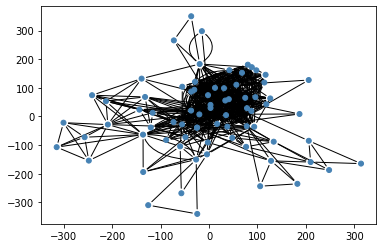

In [6]:
#layout = g.layout("kk")
#layout = igraph_layout_from_cx_cartesian_layout(g["cartesian_layout"])

l = igraph_layout_from_cx_cartesian_layout(g, test_network.get_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT))
print(l)
draw_igraph_with_cx_layout(g, test_network.get_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT))

#G = g.to_networkx()
#nx.draw(G, node_size=50)
#plt.show()


In [ ]:
def make_networkx_pos_from_cx_coordinates(cx_network):
    cart_coords = cx_network.get_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT)
    pos = {}
    for node in cart_coords:
        pos[node["node"]] = (node["x"],node["y"])     
    return pos

def make_networkx_from_coordinates(coords):
    G2 = nx.Graph()
    for node_id, node in coords.items():
        G2.add_node(node_id, pos=(node['x'], node['y']))
    return G2
    
    
c = make_coordinates(test_network, gb)
for node_id, node in c.items():
    print(node['x'], " ", node['y'])
    
netx = make_networkx_from_coordinates(c)
nx.draw(netx)



75 75


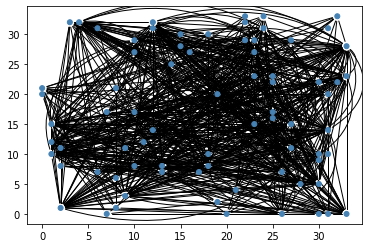

In [10]:
gb = make_gameboard(len(test_network.get_nodes()))
# print(test_network.get_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT))
coords = make_coords_from_cx(test_network, gb)
#print(coords)
# cx_l = cx_layout_from_coords(coords)
# print(cx_l)
draw_igraph_with_coords(g, coords)

In [ ]:
G2 = nx.Graph()
G2.add_node(900,pos=(0,0))
G2.add_node(901,pos=(1,0))
G2.add_node(902,pos=(0,1))
G2.add_node(903,pos=(1,1))
G2.add_node(904,pos=(0,-1))
node_pos=nx.get_node_attributes(G2,'pos')
print(node_pos)
nx.draw(G2)

In [ ]:
test_cx = test_network.to_cx()
Cytoscape(data=test_cx, format='cx')